In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from pyspark.sql import SparkSession
# from pyspark.context import SparkContext 
import re
import sys
import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
# path = "datasets/2010.csv"
# spark = SparkSession(sc)

# Exploring the datasets

## Interesting attributes

1. total_funding_amount
2. awarding_agency_name
3. awarding_sub_agency_name
4. recipient_name
5. cfda_title
6. award_description 

## Plot number of awards each FY in Colorado

In [3]:
def plot_num_awards(path, ax, title):
    df = pd.read_csv(path)
    x = [i for i in df["awarding_agency_name"].value_counts().index]
    y = [df["awarding_agency_name"].value_counts()[i] for i in x]
    for i in range(len(x)):
        x[i] = x[i][x[i].find("(")+1:-1]
    
    ax.bar(x, y)
    ax.set_title(title)


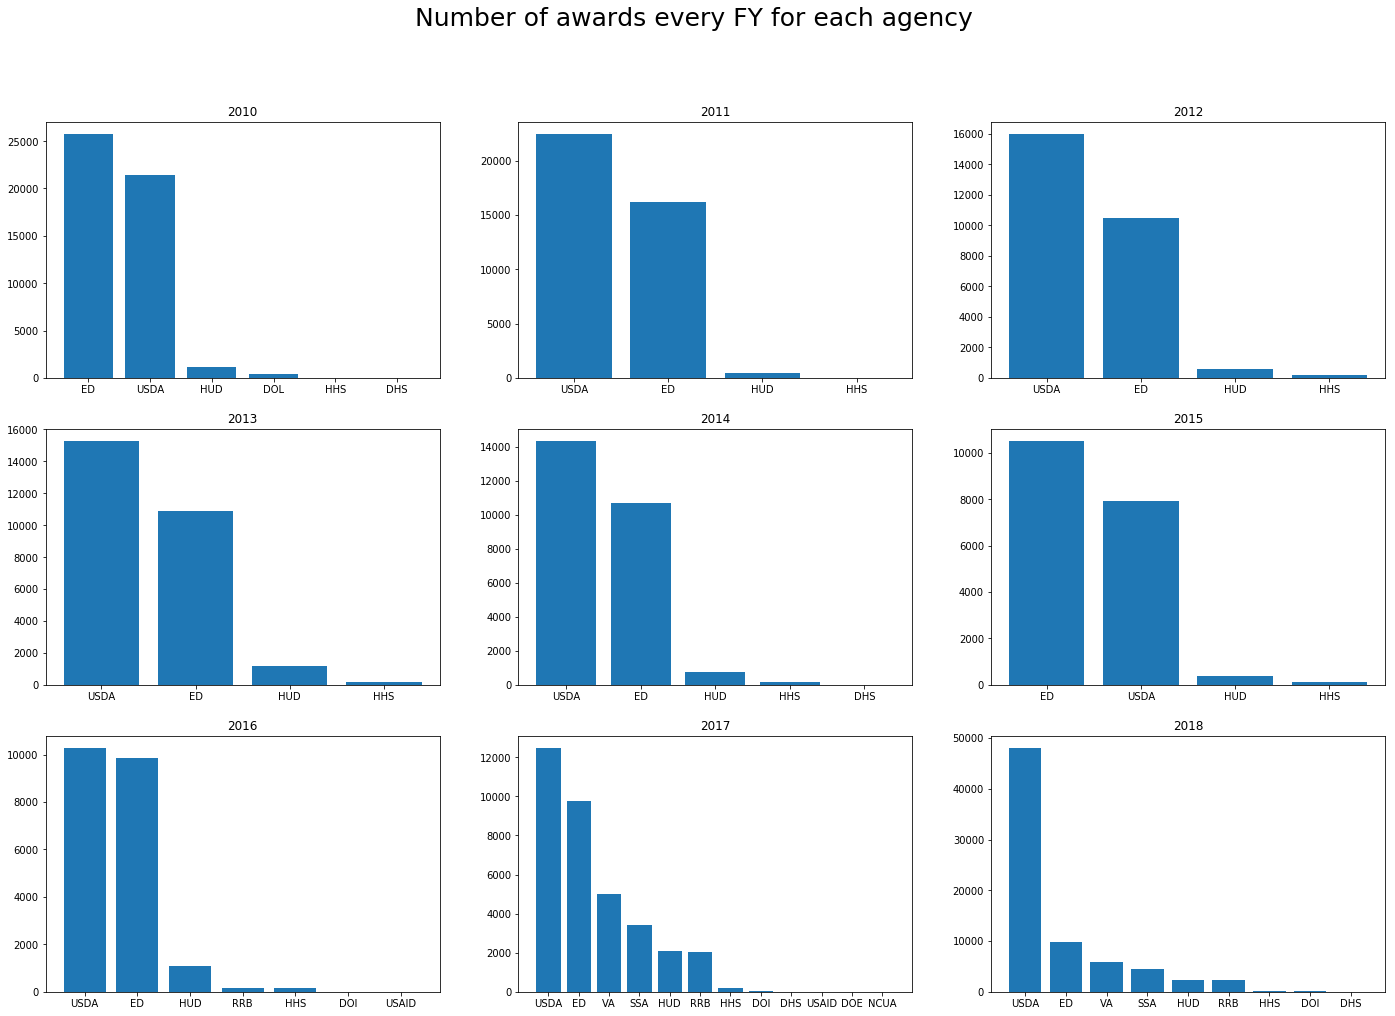

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(24, 16))
fig.suptitle("Number of awards every FY for each agency", size=25)
plot_num_awards("datasets/colorado/2010.csv", axes[0, 0], "2010")
plot_num_awards("datasets/colorado/2011.csv", axes[0, 1], "2011")
plot_num_awards("datasets/colorado/2012.csv", axes[0, 2], "2012")
plot_num_awards("datasets/colorado/2013.csv", axes[1, 0], "2013")
plot_num_awards("datasets/colorado/2014.csv", axes[1, 1], "2014")
plot_num_awards("datasets/colorado/2015.csv", axes[1, 2], "2015")
plot_num_awards("datasets/colorado/2016.csv", axes[2, 0], "2016")
plot_num_awards("datasets/colorado/2017.csv", axes[2, 1], "2017")
plot_num_awards("datasets/colorado/2018.csv", axes[2, 2], "2018")
plt.savefig("1")
plt.show()

## Plot total funding each FY in Colorado

In [5]:
def plot_tot_funding(path, ax, title):
    df = pd.read_csv(path)
    x = [i for i in df["awarding_agency_name"].value_counts().index]
    y = []
    for i in range(len(x)):
        y.append(df[df["awarding_agency_name"] == x[i]]["total_funding_amount"].sum()/10**6)
        x[i] = x[i][x[i].find("(")+1:-1]
    
    ax.bar(x, y)
    ax.set_title(title)


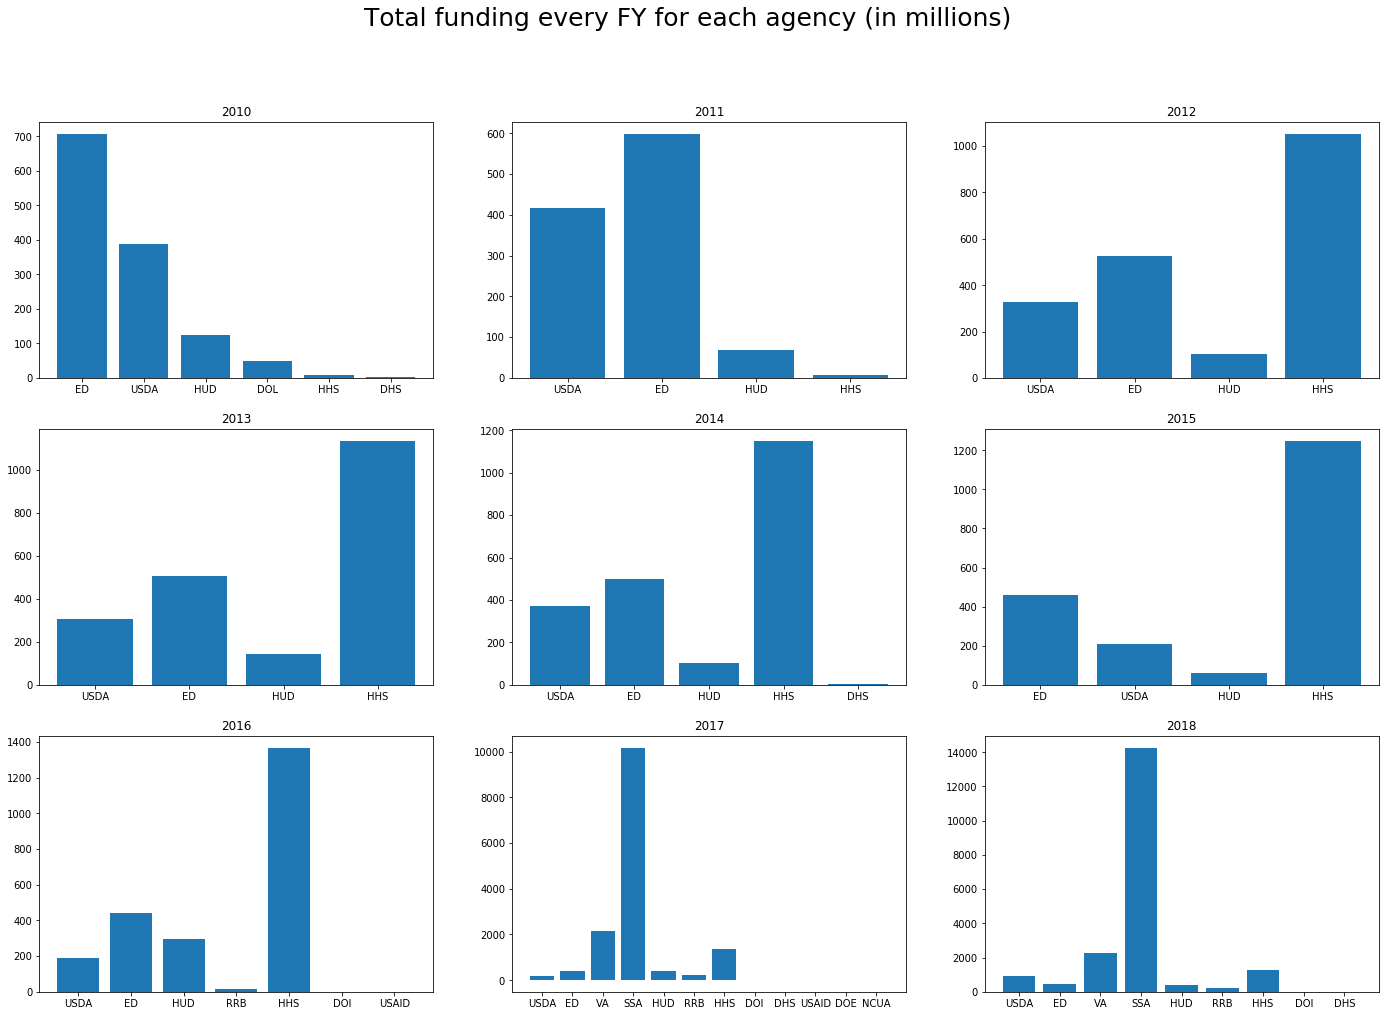

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(24, 16))
fig.suptitle("Total funding every FY for each agency (in millions)", size=25)
plot_tot_funding("datasets/colorado/2010.csv", axes[0, 0], "2010")
plot_tot_funding("datasets/colorado/2011.csv", axes[0, 1], "2011")
plot_tot_funding("datasets/colorado/2012.csv", axes[0, 2], "2012")
plot_tot_funding("datasets/colorado/2013.csv", axes[1, 0], "2013")
plot_tot_funding("datasets/colorado/2014.csv", axes[1, 1], "2014")
plot_tot_funding("datasets/colorado/2015.csv", axes[1, 2], "2015")
plot_tot_funding("datasets/colorado/2016.csv", axes[2, 0], "2016")
plot_tot_funding("datasets/colorado/2017.csv", axes[2, 1], "2017")
plot_tot_funding("datasets/colorado/2018.csv", axes[2, 2], "2018")
plt.savefig("2")
plt.show()

# States characteristics and trends

### Populations:
* Oregon: 4.143 million
* Colorado: 5.607 million
* Arizona: 7.016 million
* Ohio: 11.66 million
* Pennsylvania: 12.81 million
* California: 39.54 million

### Regions:
* West coast: Oregon, California
* West: Arizona, Colorado
* East: Ohio, Pennsylvania

In [7]:
results = {}

In [8]:
x = ["Oregon", "Colorado", "Arizaon", "Ohio", "Pennsylvania", "Califronia"]
i = 0
for file in glob.glob("datasets/"+x[i]+"/*"):
    i+=1
    print(file)

datasets/Oregon/2018.csv
datasets/Oregon/2015.csv
datasets/Oregon/2014.csv
datasets/Oregon/2016.csv
datasets/Oregon/2017.csv
datasets/Oregon/2013.csv
datasets/Oregon/2012.csv
datasets/Oregon/2010.csv
datasets/Oregon/2011.csv


## (1) A comparison of total funding between states

In [9]:
def tot_funding_states(path, year, ax, title):
    x = ["Oregon", "Colorado", "Arizona", "Ohio", "Pennsylvania", "California"]
    y = []
    for i in range(6):
        for file in glob.glob(path+"/"+x[i]+"/*"):
            if year in file:
                df = pd.read_csv(file)
                y.append(df["total_funding_amount"].sum()/10**6)
    ax.bar(x, y)
    ax.set_ylim(0, 165000)
    ax.set_title(title)

    tot_funding = {}
    for i in range(len(x)):
        tot_funding[x[i]] = y[i]
    
    return tot_funding

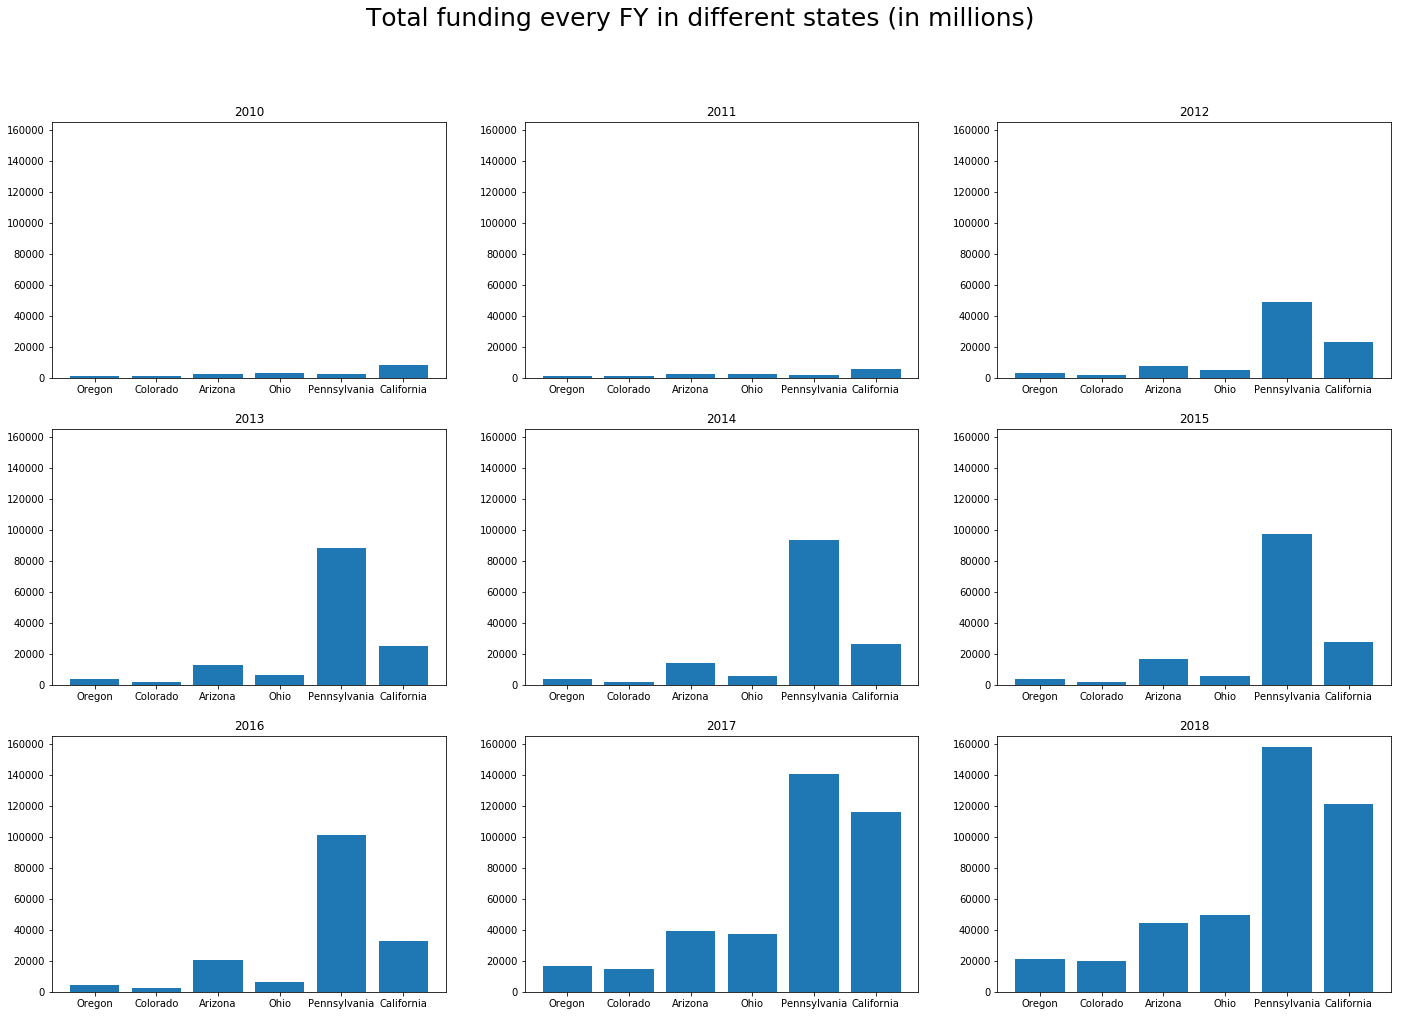

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(24, 16))
fig.suptitle("Total funding every FY in different states (in millions)", size=25)

results["tot_funding"] = {}
results["tot_funding"]["2010"] = tot_funding_states("datasets", "2010", axes[0, 0], "2010")
results["tot_funding"]["2011"] = tot_funding_states("datasets", "2011", axes[0, 1], "2011")
results["tot_funding"]["2012"] = tot_funding_states("datasets", "2012", axes[0, 2], '2012')
results["tot_funding"]["2013"] = tot_funding_states("datasets", "2013", axes[1, 0], '2013')
results["tot_funding"]["2014"] = tot_funding_states("datasets", "2014", axes[1, 1], '2014')
results["tot_funding"]["2015"] = tot_funding_states("datasets", "2015", axes[1, 2], '2015')
results["tot_funding"]["2016"] = tot_funding_states("datasets", "2016", axes[2, 0], '2016')
results["tot_funding"]["2017"] = tot_funding_states("datasets", "2017", axes[2, 1], '2017')
results["tot_funding"]["2018"] = tot_funding_states("datasets", "2018", axes[2, 2], '2018')

plt.savefig("figs/tot_funding")
plt.show()

In [11]:
results['tot_funding']['2018']

{'Oregon': 21206.649163000006,
 'Colorado': 19837.57382096,
 'Arizona': 44326.88044605,
 'Ohio': 49515.56181940999,
 'Pennsylvania': 158172.41883510997,
 'California': 121054.79048923}

### (1) Conclusion:
* We can say, in overall, population can affect the total funding in a state. However, that is not always the case.
* We cannot assume anything depending on the geographic region. 

## (2) A comparison of unique awards given between states

In [12]:
def uni_awards_states(path, year, ax, title):
    x = ["Oregon", "Colorado", "Arizona", "Ohio", "Pennsylvania", "California"]
    y = []
    for i in range(6):
        for file in glob.glob(path+"/"+x[i]+"/*"):
            if year in file:
                df = pd.read_csv(file)
                y.append(len(df["award_id_fain"].value_counts()))
    ax.bar(x, y)
    ax.set_ylim(0, 175000)
    ax.set_title(title)
    
    uni_awards = {}
    for i in range(len(x)):
        uni_awards[x[i]] = y[i]
        
    return uni_awards

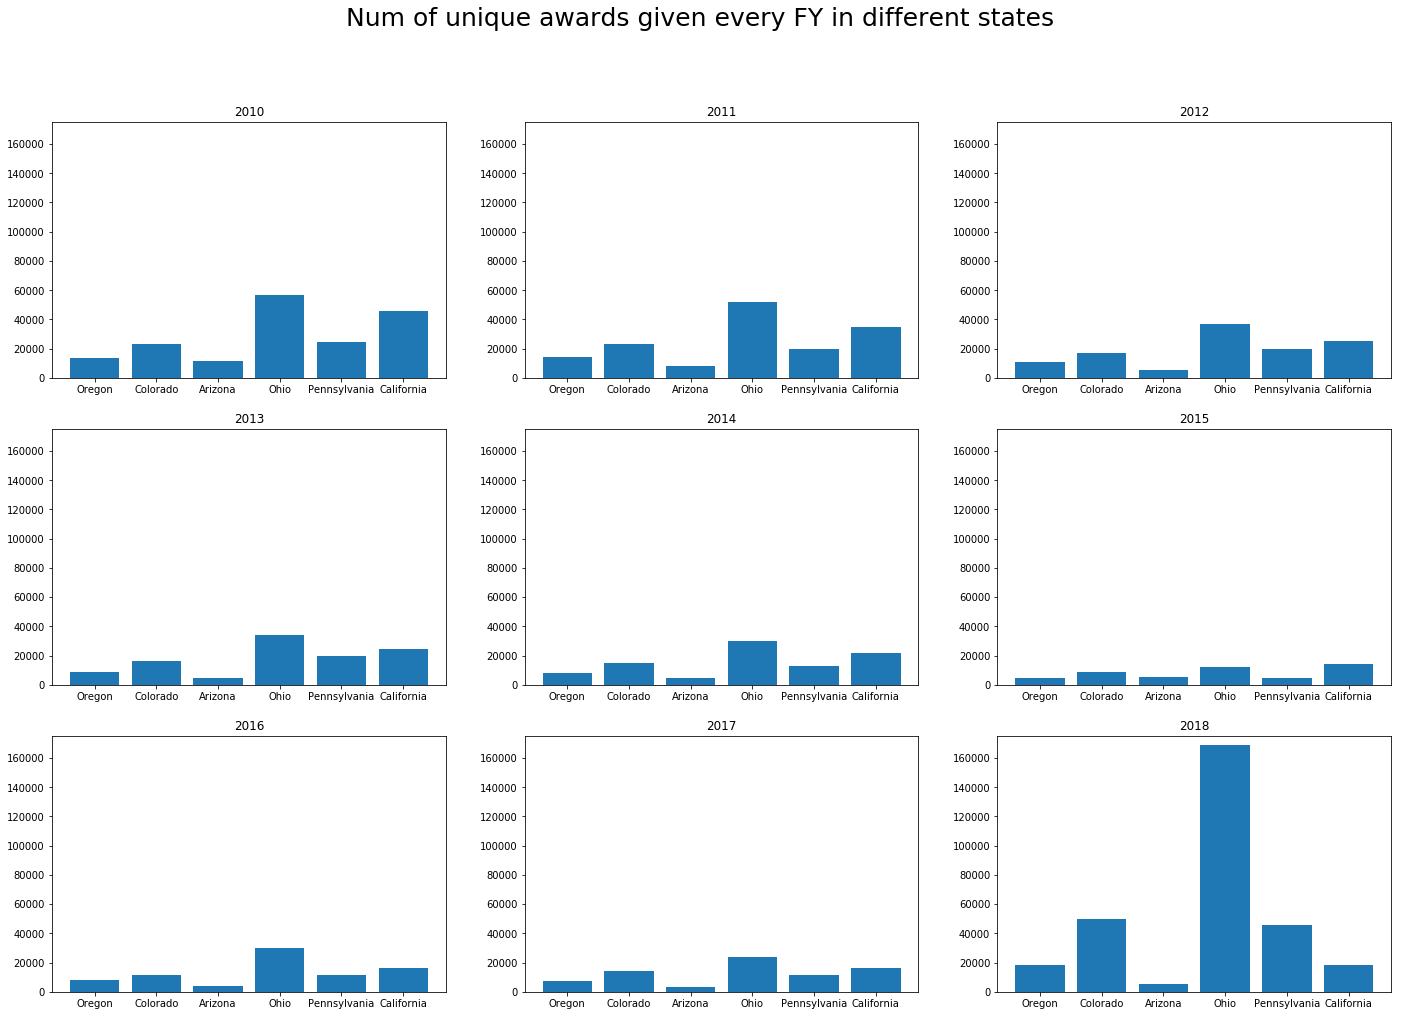

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(24, 16))
fig.suptitle("Num of unique awards given every FY in different states", size=25)

results["uni_awards"] = {}
results["uni_awards"]["2010"] = uni_awards_states("datasets", "2010", axes[0, 0], "2010")
results["uni_awards"]["2011"] = uni_awards_states("datasets", "2011", axes[0, 1], "2011")
results["uni_awards"]["2012"] = uni_awards_states("datasets", "2012", axes[0, 2], '2012')
results["uni_awards"]["2013"] = uni_awards_states("datasets", "2013", axes[1, 0], '2013')
results["uni_awards"]["2014"] = uni_awards_states("datasets", "2014", axes[1, 1], '2014')
results["uni_awards"]["2015"] = uni_awards_states("datasets", "2015", axes[1, 2], '2015')
results["uni_awards"]["2016"] = uni_awards_states("datasets", "2016", axes[2, 0], '2016')
results["uni_awards"]["2017"] = uni_awards_states("datasets", "2017", axes[2, 1], '2017')
results["uni_awards"]["2018"] = uni_awards_states("datasets", "2018", axes[2, 2], '2018')

plt.savefig("figs/uni_awards")
plt.show()

In [14]:
# uni_awards_2018

### (2) Conclusion:
* We can assume that the higher the number of unique awards given, the more the variety in the awards categories.
* I do not see any correlation to the populations and the geographic regions.

## (3) A comparison of total awards given between states

In [15]:
def tot_awards_states(path, year, ax, title):
    x = ["Oregon", "Colorado", "Arizona", "Ohio", "Pennsylvania", "California"]
    y = []
    for i in range(6):
        for file in glob.glob(path+"/"+x[i]+"/*"):
            if year in file:
                df = pd.read_csv(file)
                y.append(len(df))
    ax.bar(x, y)
    ax.set_ylim(0, 230000)
    ax.set_title(title)
    
    tot_awards = {}
    for i in range(len(x)):
        tot_awards[x[i]] = y[i]

    return tot_awards

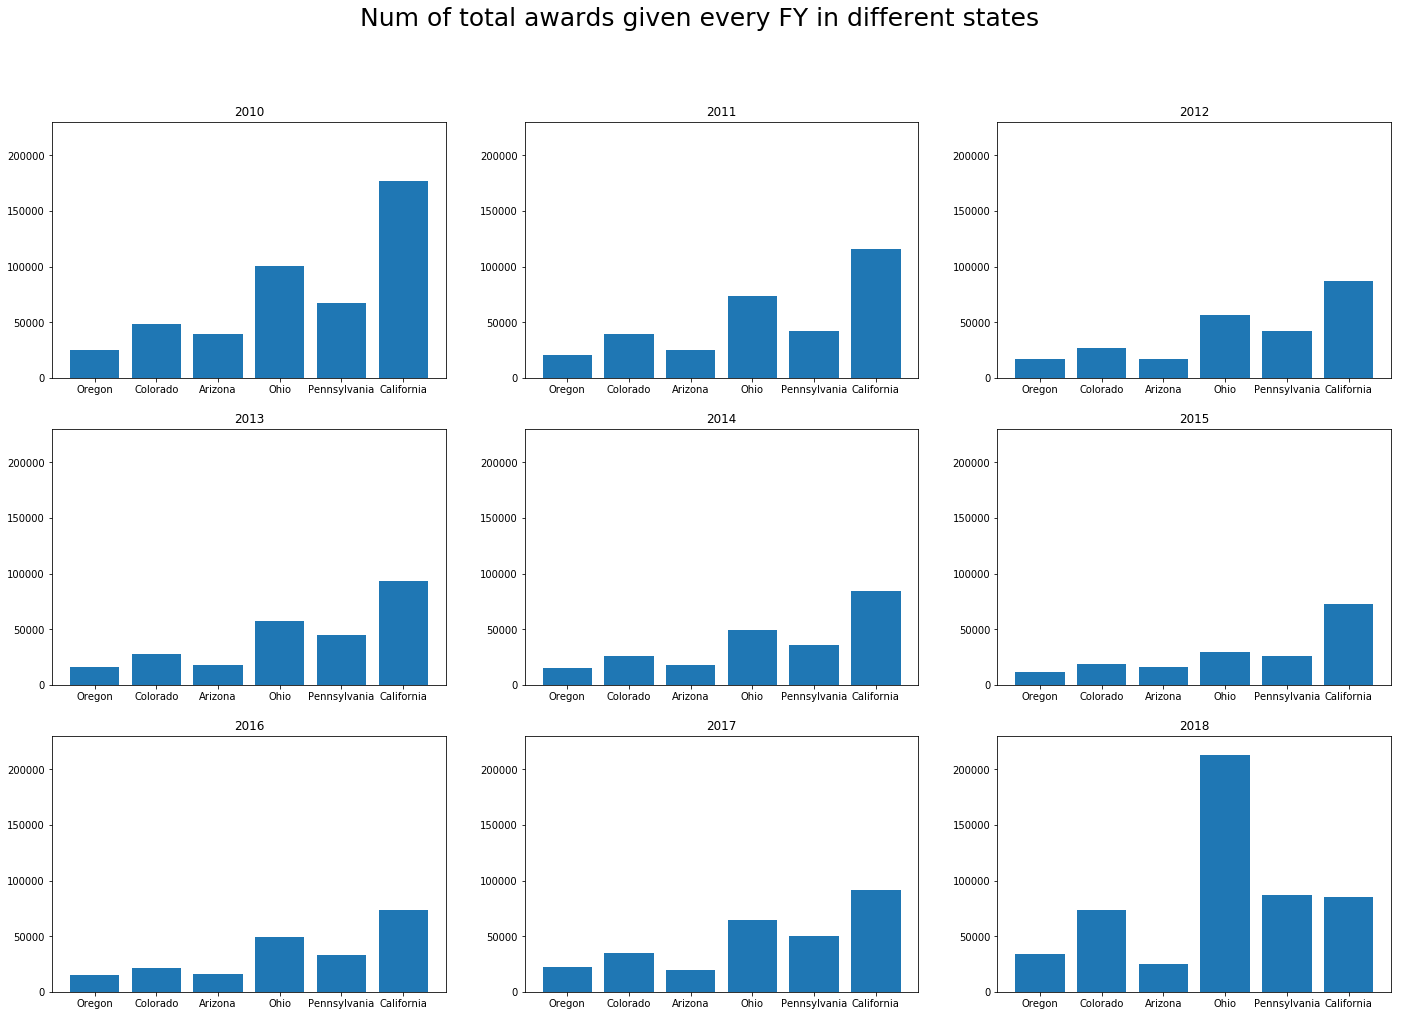

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(24, 16))
fig.suptitle("Num of total awards given every FY in different states", size=25)

results["tot_awards"] = {}
results["tot_awards"]["2010"] = tot_awards_states("datasets", "2010", axes[0, 0], "2010")
results["tot_awards"]["2011"] = tot_awards_states("datasets", "2011", axes[0, 1], "2011")
results["tot_awards"]["2012"] = tot_awards_states("datasets", "2012", axes[0, 2], '2012')
results["tot_awards"]["2013"] = tot_awards_states("datasets", "2013", axes[1, 0], '2013')
results["tot_awards"]["2014"] = tot_awards_states("datasets", "2014", axes[1, 1], '2014')
results["tot_awards"]["2015"] = tot_awards_states("datasets", "2015", axes[1, 2], '2015')
results["tot_awards"]["2016"] = tot_awards_states("datasets", "2016", axes[2, 0], '2016')
results["tot_awards"]["2017"] = tot_awards_states("datasets", "2017", axes[2, 1], '2017')
results["tot_awards"]["2018"] = tot_awards_states("datasets", "2018", axes[2, 2], '2018')

plt.savefig("figs/tot_awards")
plt.show()

In [17]:
# tot_awards_2018

### (3) Conclusion:
* It is interesting to see that the number of total awards given is almost steady throughout the years in each state, however, it changed drastically in Ohio in 2018.

## (4) Histograms of amounts of fundings in each state

In [18]:
def hist_amount_awards(path, year, start, end, limit, bin_size):
    fig, axes = plt.subplots(1, 6, figsize=(18, 8))
    fig.suptitle("Year: {}".format(year), size=25)
    percents = {}

    x = ["Oregon", "Colorado", "Arizona", "Ohio", "Pennsylvania", "California"]
    i = 0
    for i in range(6):
        for file in glob.glob(path+"/"+x[i]+"/*"):
            if year in file:
                df1 = pd.read_csv(file)
                df2 = df1[(df1["total_funding_amount"] > start) & (df1["total_funding_amount"] < end)]
                percentage = len(df2)/len(df1)*100
                percents[x[i]] = percentage
                
                bins = [i for i in range(start, end+100, bin_size)]
                axes[i].hist(df2["total_funding_amount"], bins=bins)
                axes[i].set_title(x[i]+"\n{:.3f}% of tot funding".format(percentage))
                axes[i].set_ylim(0, limit)
                i += 1
                
    plt.savefig("figs/hist_{}".format(year))
    plt.show()
    
    return percents

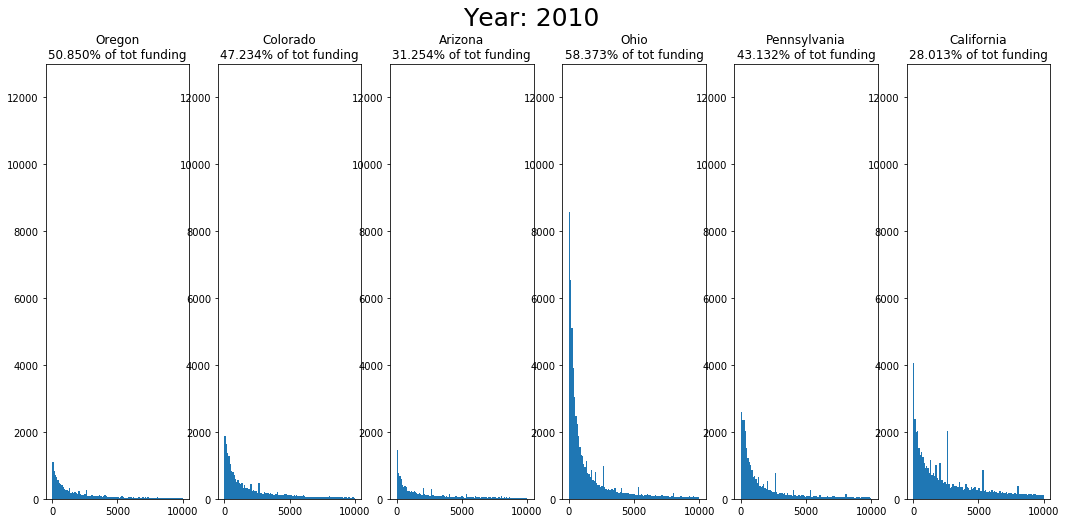

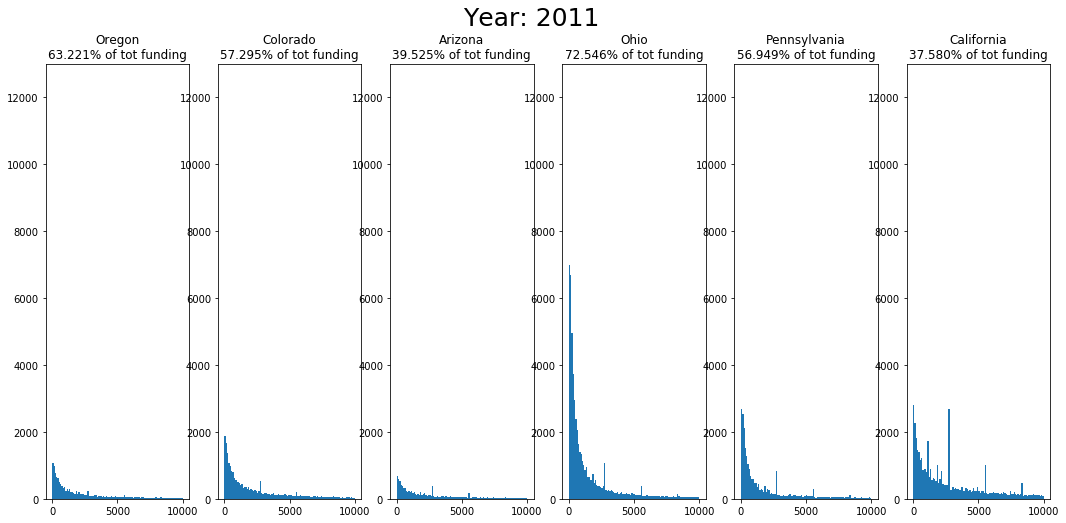

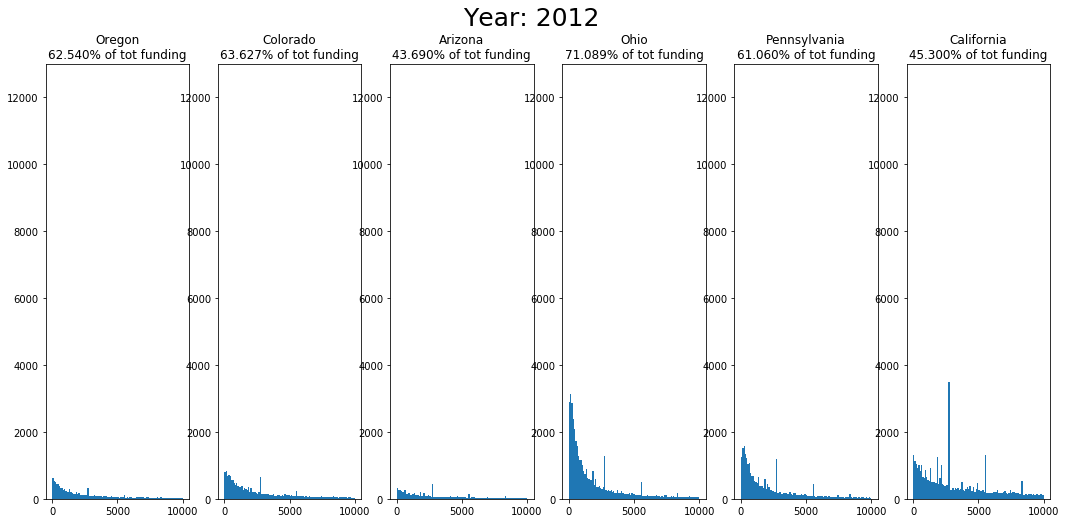

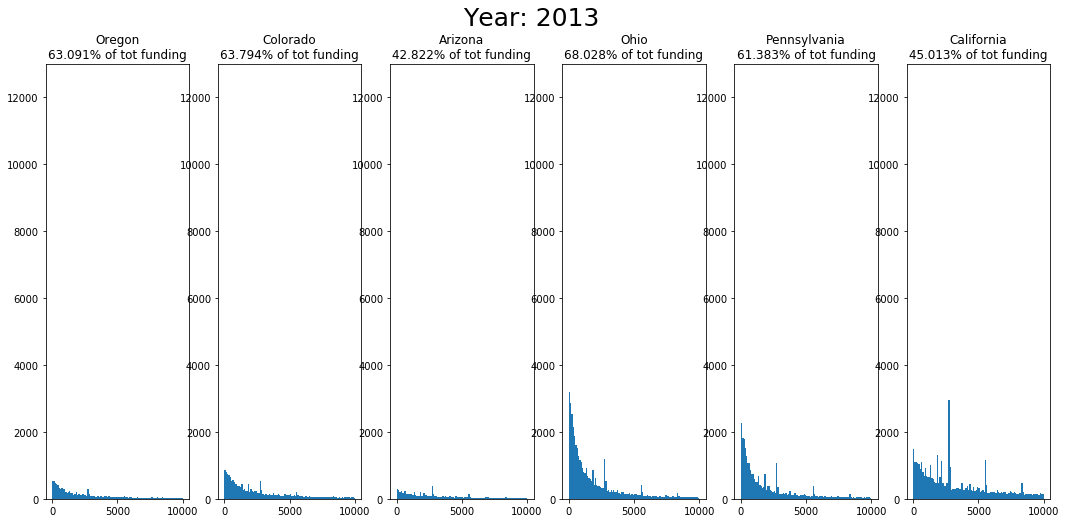

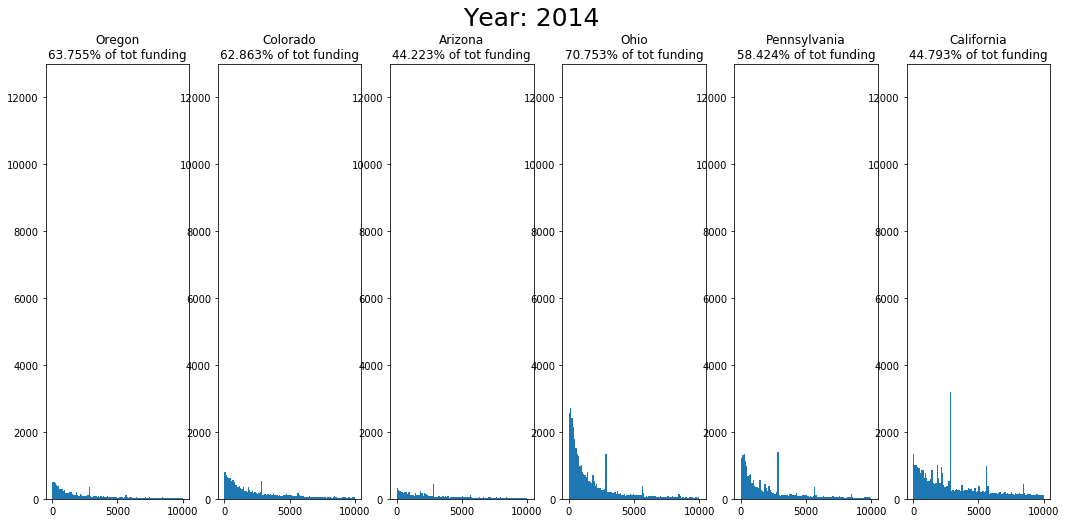

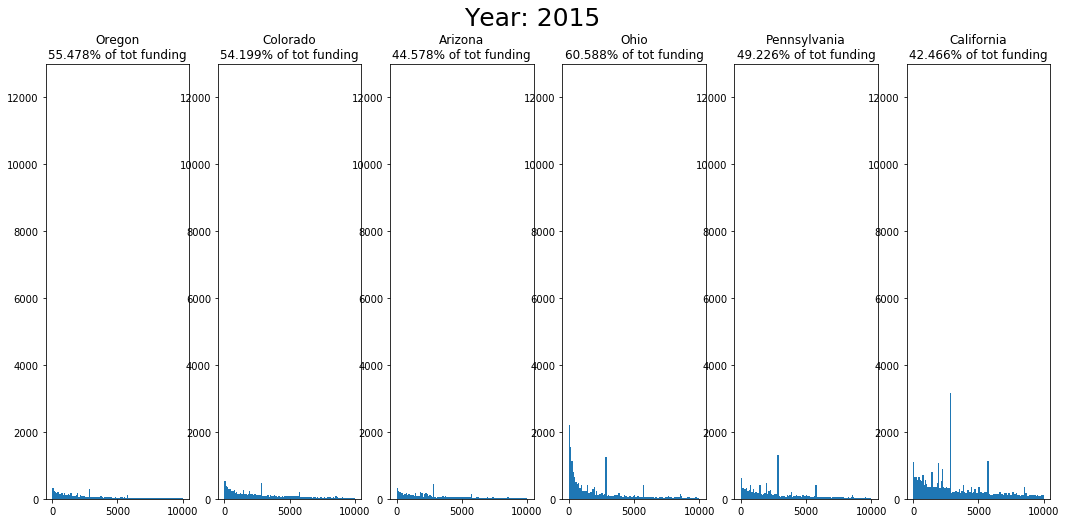

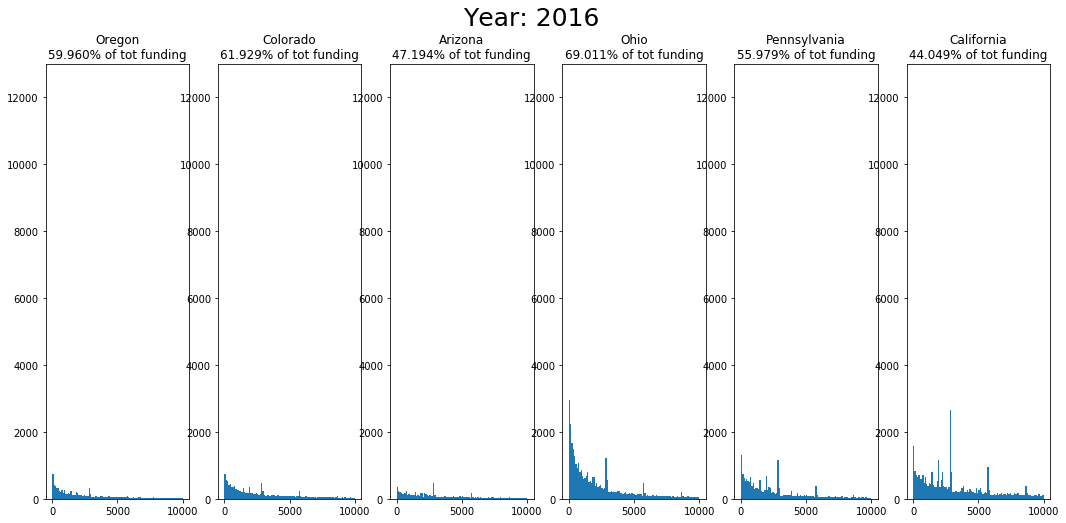

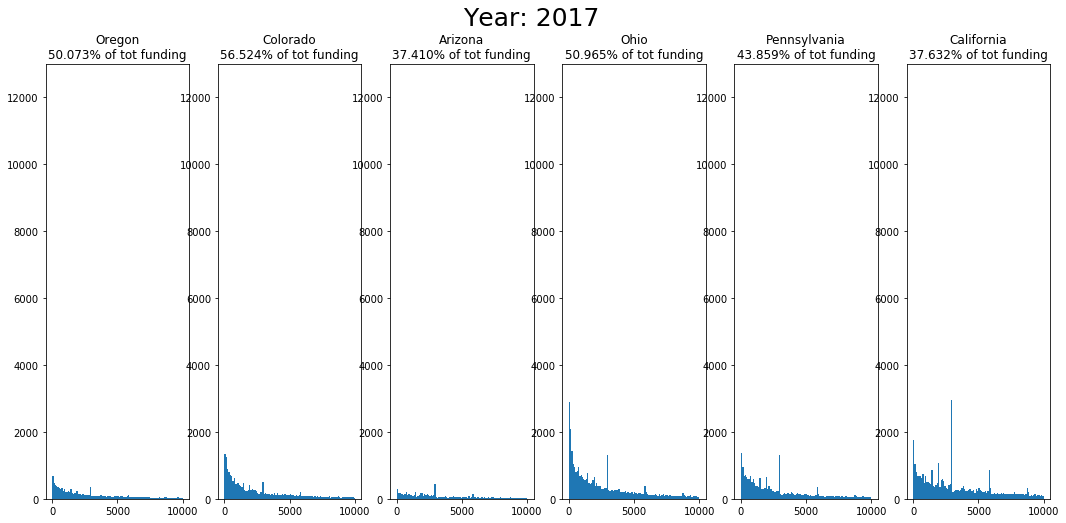

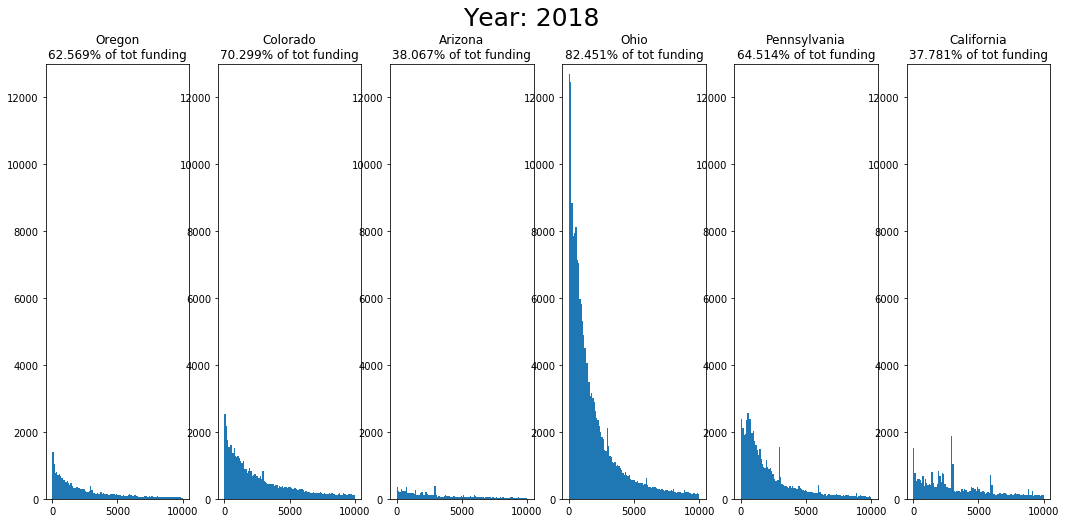

In [19]:
results["percents"] = {}
results["percents"]["2010"] = hist_amount_awards("datasets", "2010", 0, 10000, 13000, 100)
results["percents"]["2011"] = hist_amount_awards("datasets", "2011", 0, 10000, 13000, 100)
results["percents"]["2012"] = hist_amount_awards("datasets", "2012", 0, 10000, 13000, 100)
results["percents"]["2013"] = hist_amount_awards("datasets", "2013", 0, 10000, 13000, 100)
results["percents"]["2014"] = hist_amount_awards("datasets", "2014", 0, 10000, 13000, 100)
results["percents"]["2015"] = hist_amount_awards("datasets", "2015", 0, 10000, 13000, 100)
results["percents"]["2016"] = hist_amount_awards("datasets", "2016", 0, 10000, 13000, 100)
results["percents"]["2017"] = hist_amount_awards("datasets", "2017", 0, 10000, 13000, 100)
results["percents"]["2018"] = hist_amount_awards("datasets", "2018", 0, 10000, 13000, 100)

In [20]:
# percents_2018

### (4) Conclusion:
* I think there could be correlation between the number of awards given and the percentage of the awards that are between 0\$ and 10000\$ to the total awards. 

## (5) Final plots. Show clear patterns over the years

In [21]:
results.keys()

dict_keys(['tot_funding', 'uni_awards', 'tot_awards', 'percents'])

In [22]:
def plot_changes(trend, state, denom):
    y = []
    for i in range(2010, 2019):
        y.append(results[trend][str(i)][state]/denom)
        
    plt.plot([i for i in range(2010, 2019)], y)

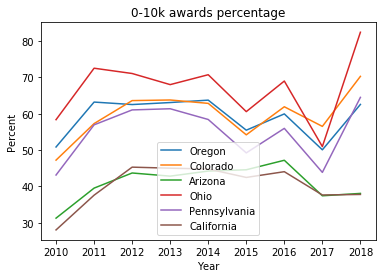

In [23]:
x = ["Oregon", "Colorado", "Arizona", "Ohio", "Pennsylvania", "California"]
for i in x:
    plot_changes("percents", i, 1)
plt.legend(x)
plt.xlabel("Year")
plt.ylabel("Percent")
plt.title("0-10k awards percentage")
plt.savefig("figs/percents")

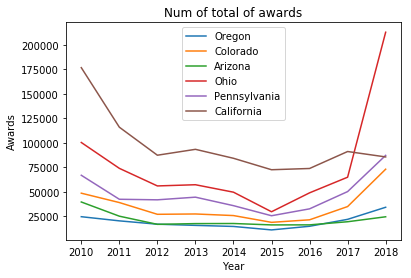

In [24]:
x = ["Oregon", "Colorado", "Arizona", "Ohio", "Pennsylvania", "California"]
for i in x:
    plot_changes("tot_awards", i, 1)
plt.legend(x)
plt.xlabel("Year")
plt.ylabel("Awards")
plt.title("Num of total of awards")
plt.savefig("figs/tot_awards2")

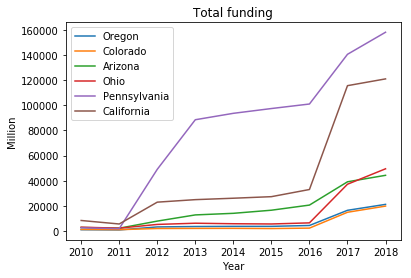

In [25]:
x = ["Oregon", "Colorado", "Arizona", "Ohio", "Pennsylvania", "California"]
for i in x:
    plot_changes("tot_funding", i, 1)
plt.legend(x)
plt.xlabel("Year")
plt.ylabel("Million")
plt.title("Total funding")
plt.savefig("figs/tot_funding2")

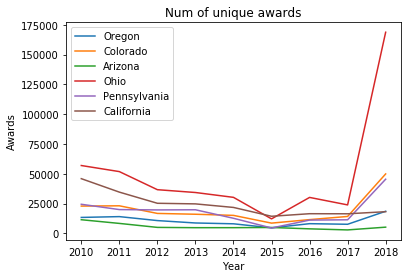

In [26]:
x = ["Oregon", "Colorado", "Arizona", "Ohio", "Pennsylvania", "California"]
for i in x:
    plot_changes("uni_awards", i, 1)
plt.legend(x)
plt.xlabel("Year")
plt.ylabel("Awards")
plt.title("Num of unique awards")
plt.savefig("figs/uni_awards2")